In [ ]:
import torch
import os
import matplotlib.pyplot as plt
if not os.path.exists('.\\data\\'):
    new_directory_path = "..\\..\\"
    os.chdir(new_directory_path)

from src.data.parsers import CocoFreeView
from src.model.rope_positional_embeddings import RopePositionEmbedding

ImportError: cannot import name 'RopePositionalEmbeddings' from 'src.model.rope_positional_embeddings' (c:\Users\ulloa\OneDrive\Desktop\Practicas\projectes\Dataset\src\model\rope_positional_embeddings.py)

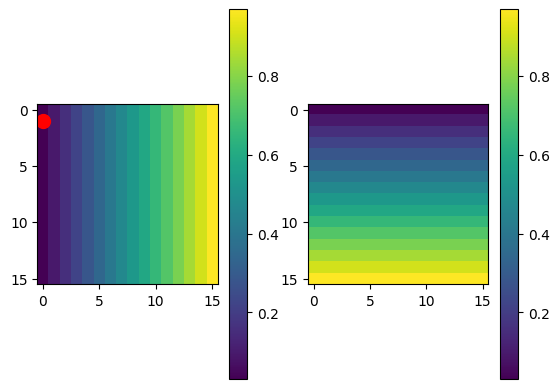

In [ ]:
pos = RopePositionEmbedding(
        embed_dim = 128,
        num_heads = 16,
        base,
        min_period,
        max_period,
        normalize_coords,
        shift_coords,
        jitter_coords,
        rescale_coords,
        dtype,
        device)
